In [769]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

# Datos oficiales extraidos de camara.cl
## Instrucctiones:
-   Los datos son dinámicos, ponga correr todo e inserte un periodo a investigar, con el siguiente formato: m-yyyy\
-   Los meses deben venir sin el 0 antes de
## Advertencias:
- algunos datos pueden no ser correctos causa de que, o el sujeto no trabajo en un mes, o se integro hace poco, o sus datos no fueron encontrados en la página.

In [770]:
period = "8-2022"

En un específico periodo, lee el csv del directorio, y extrae los datos con una columna total agregada.

In [771]:
def getValues(month):
    d = pd.read_csv("data-" + month + ".csv", index_col="Name")
    d = d.apply(pd.to_numeric, errors='ignore').fillna(-1)
    d = d.drop(columns="Unnamed: 2")
    d["Total"] = d.drop("Partido", axis=1).apply(np.sum, axis=1)
    return d

In [772]:
# Test
getValues(period)

,Partido,TRASPASO DESDE GASTOS OPERACIONALES A ASIGNACIÓN PERSONAL DE APOYO,TELEFONÍA,TRASLACIÓN,DIFUSIÓN,ACTIVIDADES DESTINADAS A LA INTERACCIÓN CON LA COMUNIDAD,ARRIENDO DE INMUEBLE,CONSUMOS BÁSICOS,EQUIPAMIENTO OFICINA PARLAMENTARIA,MATERIALES DE OFICINA,...,HABILITACIÓN DE SEDES PARLAMENTARIAS (CON AUTORIZACIÓN DE CRAP),SEGUROS DE BIENES,ARRIENDO DE OFICINAS VIRTUALES,SERVICIOS WEB,CONTRATACIÓN SERVICIO DE ALMACENAMIENTO,ARRIENDO DE OFICINA MÓVIL,MANTENCION Y REPARACIÓN DE OFICINA MÓVIL,SERVICIOS MENORES,COVID-19 PERSONAL DE APOYO,Total
Name,,,,,,,,,,,,,,,,,,,,,
Sr. Leonardo Soto,PS,0,90659,1759008,0,0,957000,193380,551960,0,...,0,0,0,0,0,0,0,500000,23960,4116447
Sr. Renzo Trisotti,UDI,0,124956,2867250,499800,0,800000,43780,0,30531,...,0,0,0,0,0,0,0,499000,0,4865317
Sr. Jorge Alessandri,UDI,20878,92561,3229053,158508,0,480000,229306,133332,416964,...,0,0,0,0,0,0,0,500000,0,5340374
Sr. Boris Barrera,PC,1437343,351181,1476132,0,0,718200,0,0,4054,...,0,0,0,0,0,0,0,256187,0,4317582
Sr. Alejandro Bernales,LIBERAL,0,73232,2067300,1391392,167060,990459,41686,56616,29816,...,0,0,0,48144,0,0,0,500000,0,5365705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sr. Juan Antonio Coloma,UDI,1237220,99594,2468534,500000,0,0,0,0,0,...,0,0,0,0,0,0,0,500000,0,4805348
Sr. Joaquín Lavín,UDI,0,176832,2078360,1615113,0,0,0,0,4346,...,0,0,0,950000,0,0,0,500000,0,5330177
Sr. Daniel Melo,PS,377031,81860,1552824,166980,0,836398,137354,0,64374,...,0,0,0,0,0,0,0,500000,0,3716821


### COLORES por partido
#### inserta del 1 al 10 que tan de izquierda o derecha es cada partido, 0 para derecha extrema, 10 para izquierda extrema.

In [773]:

gradeColors = {
    'COMUNES': 7,
    'DC': 7,
    'EVOP': 5,
    'FRVS': 5,
    'IND': 5,
    'LIBERAL': 4,
    'PC': 10,
    'PCC': 6,
    'PCS': 7,
    'PDG': 4,
    'PEV': 5,
    'PH': 6,
    'PPD': 6,
    'PR': 6,
    'PREP': 2,
    'PRI': 5,
    'PS': 7,
    'RD': 6,
    'RN': 5,
    'UDI': 1,
}

In [774]:
def colorFader(c1, c2, mix=0):  #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1 - mix) * c1 + mix * c2)


c1 = '#03FFBA'  #blue
c2 = '#FF0000'  #red


def getColorToPartido(v):
    return colorFader(c1, c2, v / 10)


colors = {}
handles = []
for i in gradeColors:
    c = getColorToPartido(gradeColors[i])
    colors[i] = c
    handles.append(mpatches.Patch(color=c, label=i))



# Gráfico con los gastos totales ordenado por ascendente, independiente de la categoría.

### Periodo

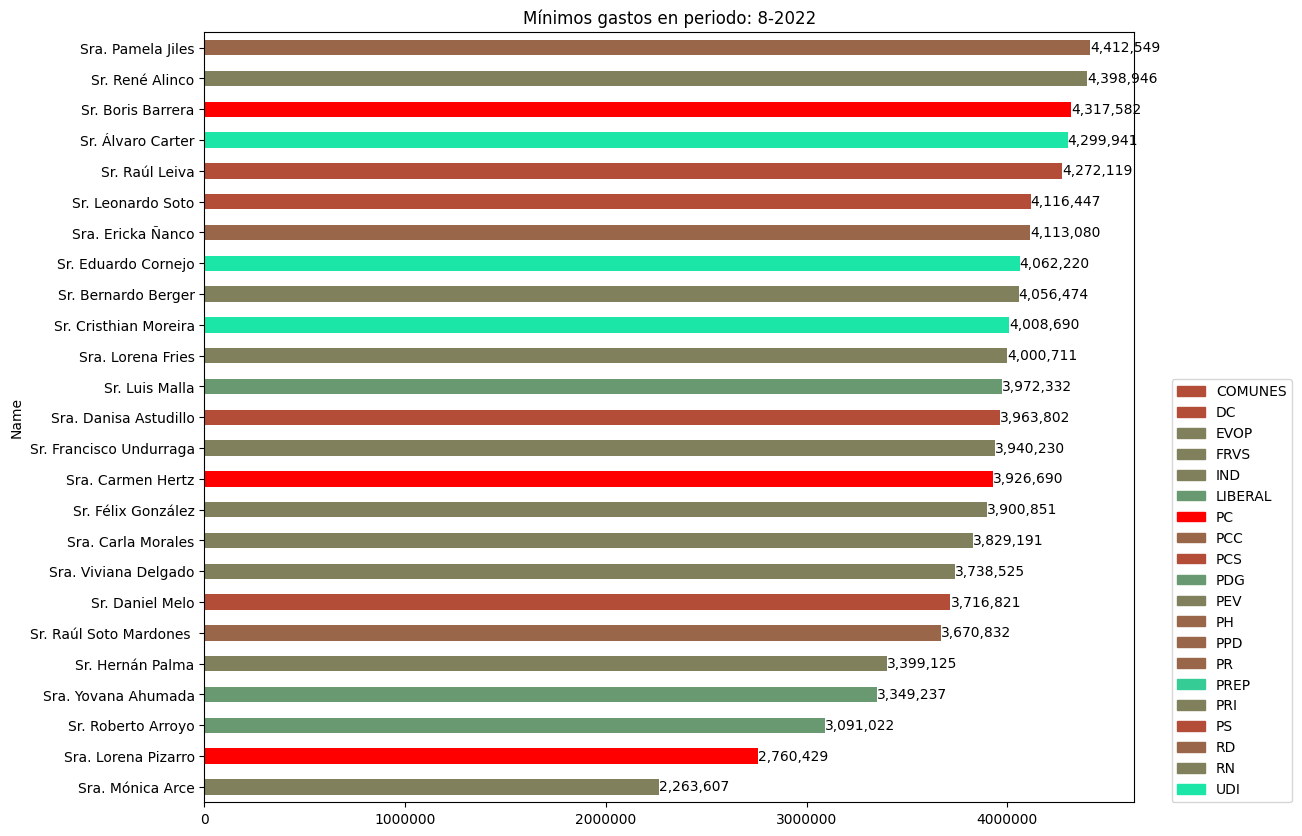

In [775]:
val = getValues(period)
analyze = val.sort_values(by="Total", ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y="Total", title="Mínimos gastos en periodo: " + period, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()

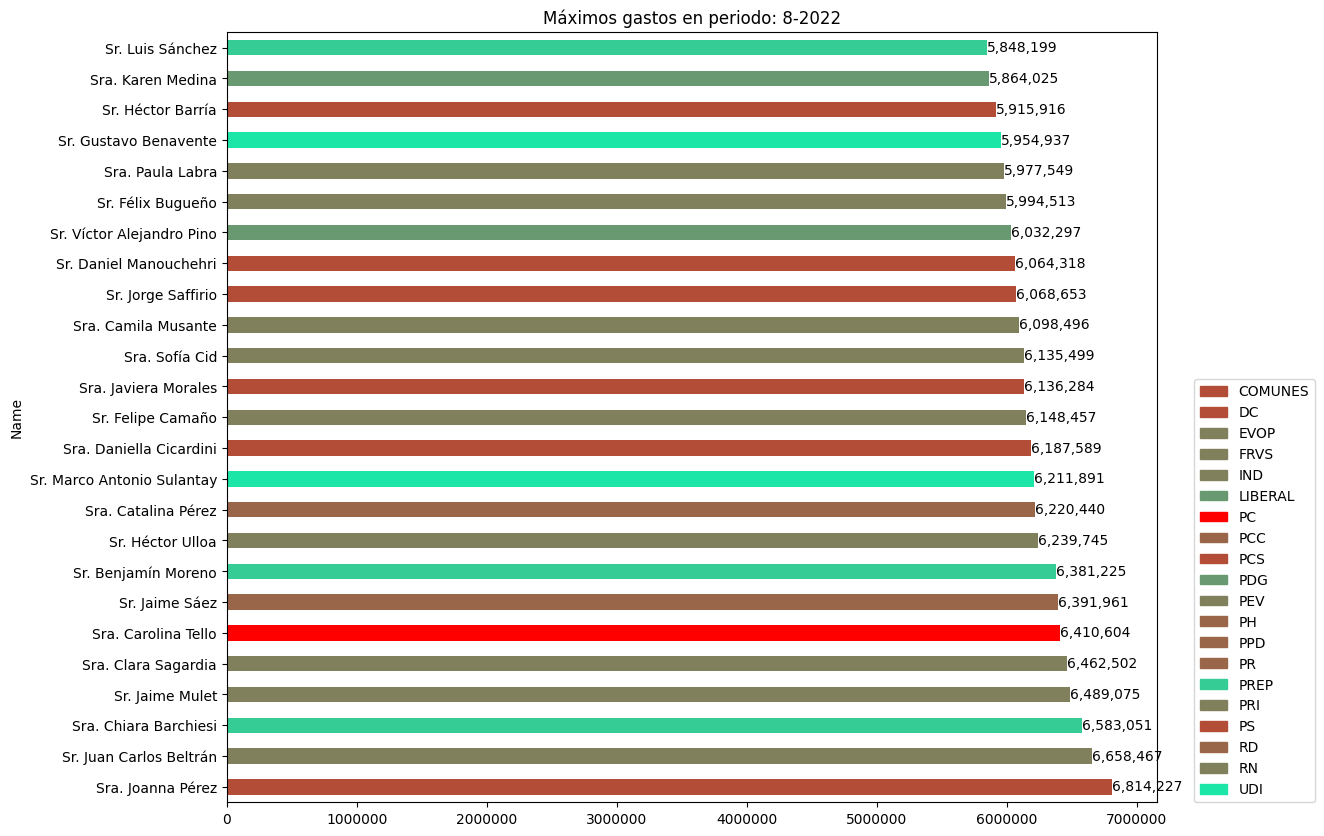

In [776]:
val = getValues(period)
analyze = val.sort_values(by="Total", ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y="Total", title="Máximos gastos en periodo: " + period, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()

# Datos interesantes


### integrantes de partido

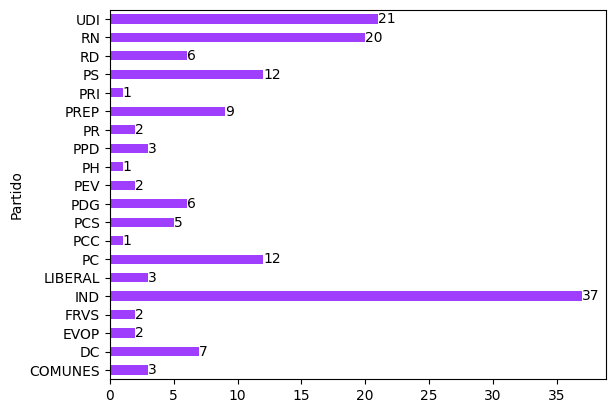

In [777]:
d = getValues(period).groupby('Partido').size().plot(kind='barh', color="#9F3FFD")

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='', )
#d.show()
plt.show()

# Promedio de gasto por partido


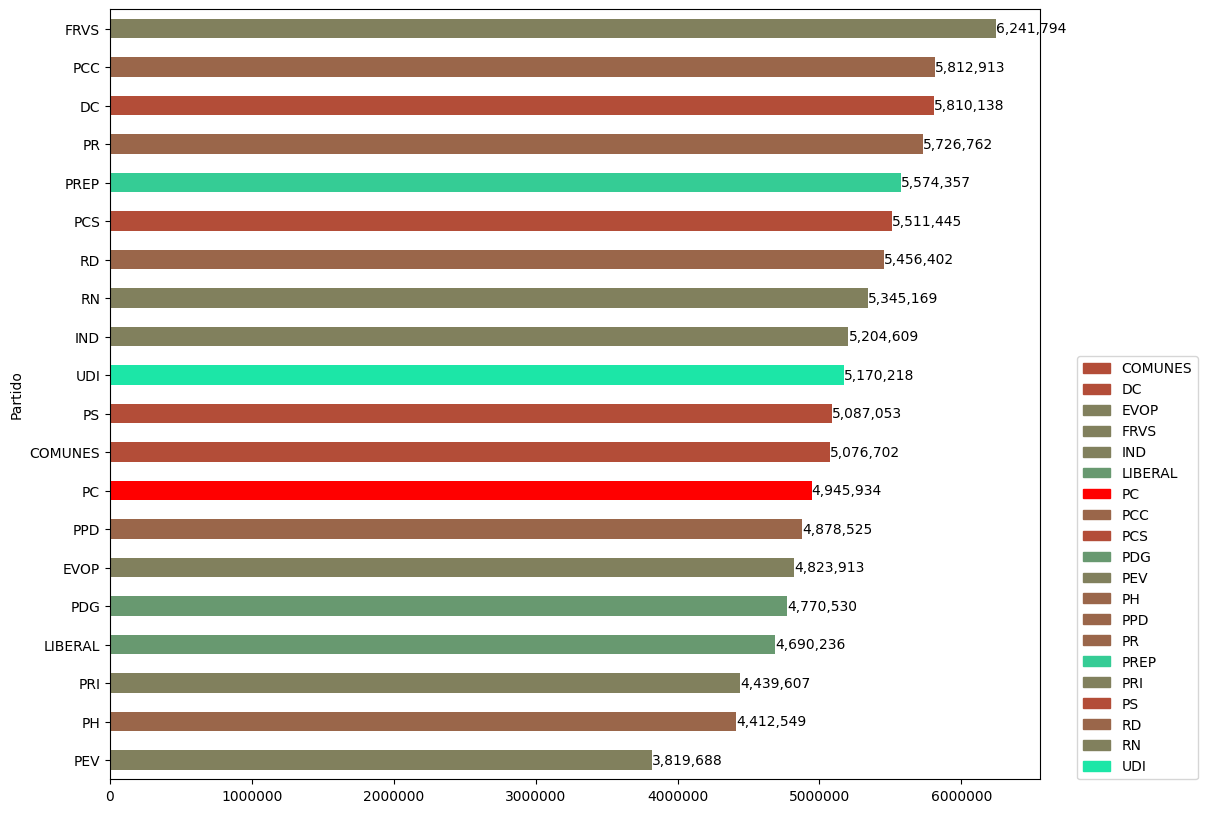

In [778]:
v = getValues(period).groupby("Partido").mean().sort_values("Total", ascending=True)

color = v.reset_index()["Partido"].map(colors).tolist()
d = v.plot(y="Total", kind="barh", color=color, figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain',axis="x" )
plt.show()

# Total Mensual

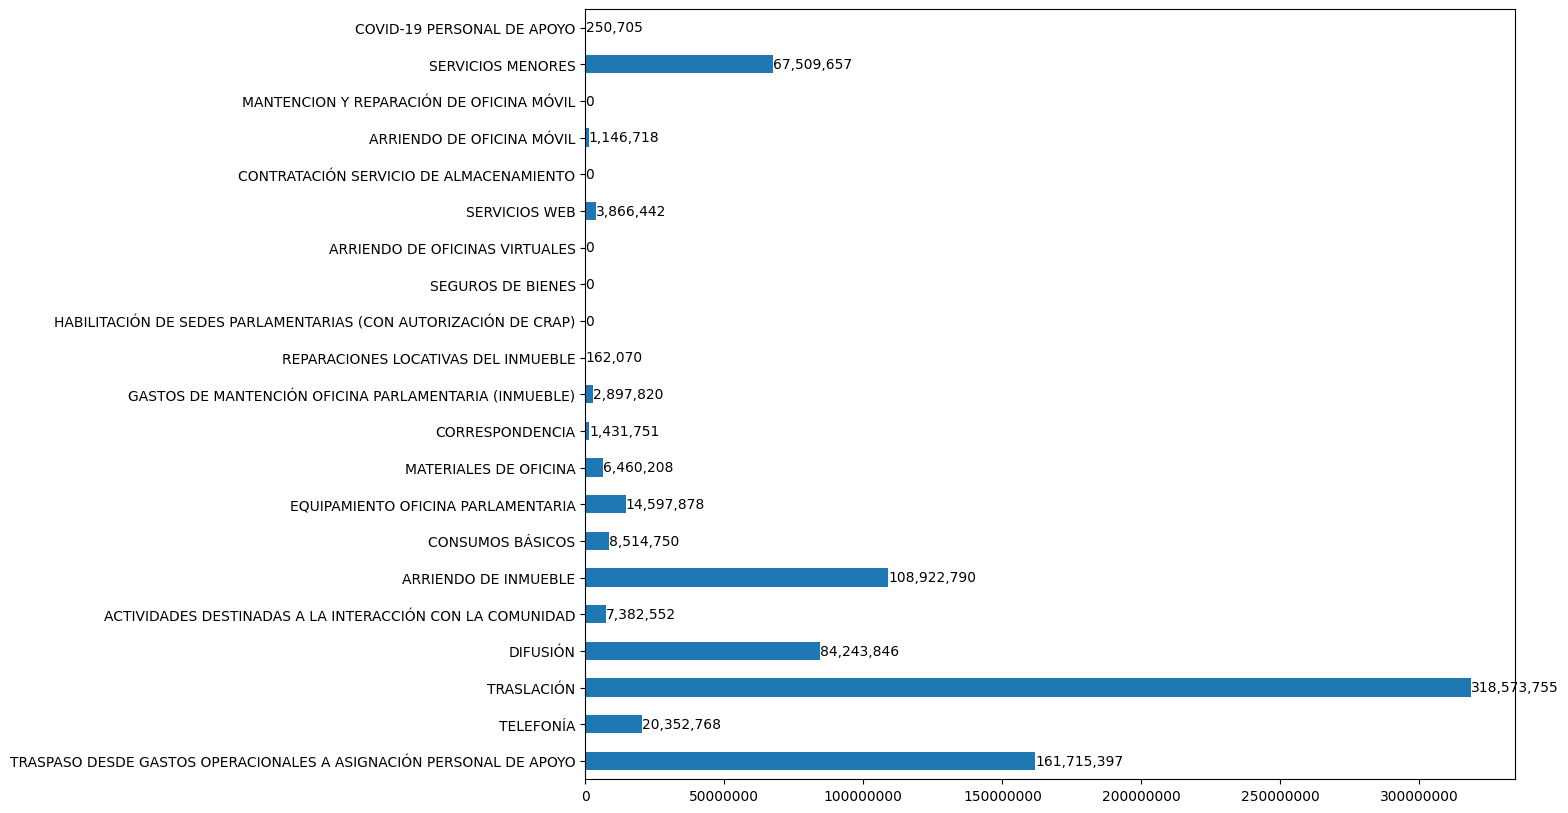

In [779]:

from matplotlib import ticker

formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)

pl = getValues(period).sum().drop(labels="Partido", axis=0).drop(labels="Total", axis=0).plot(kind="barh",
                                                                                              figsize=(12, 10))
# to number with format h
con = pl.containers[0]
pl.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
pl.ticklabel_format(style='plain', axis="x")
plt.show()


#Total

In [780]:
import re

val = getValues(period).sum().drop(labels="Partido", axis=0)["Total"]
print(re.sub(r'(?<!^)(?=(\d{3})+$)', r'.', str(val)))


808.029.107


# Promedio gastos por categoría

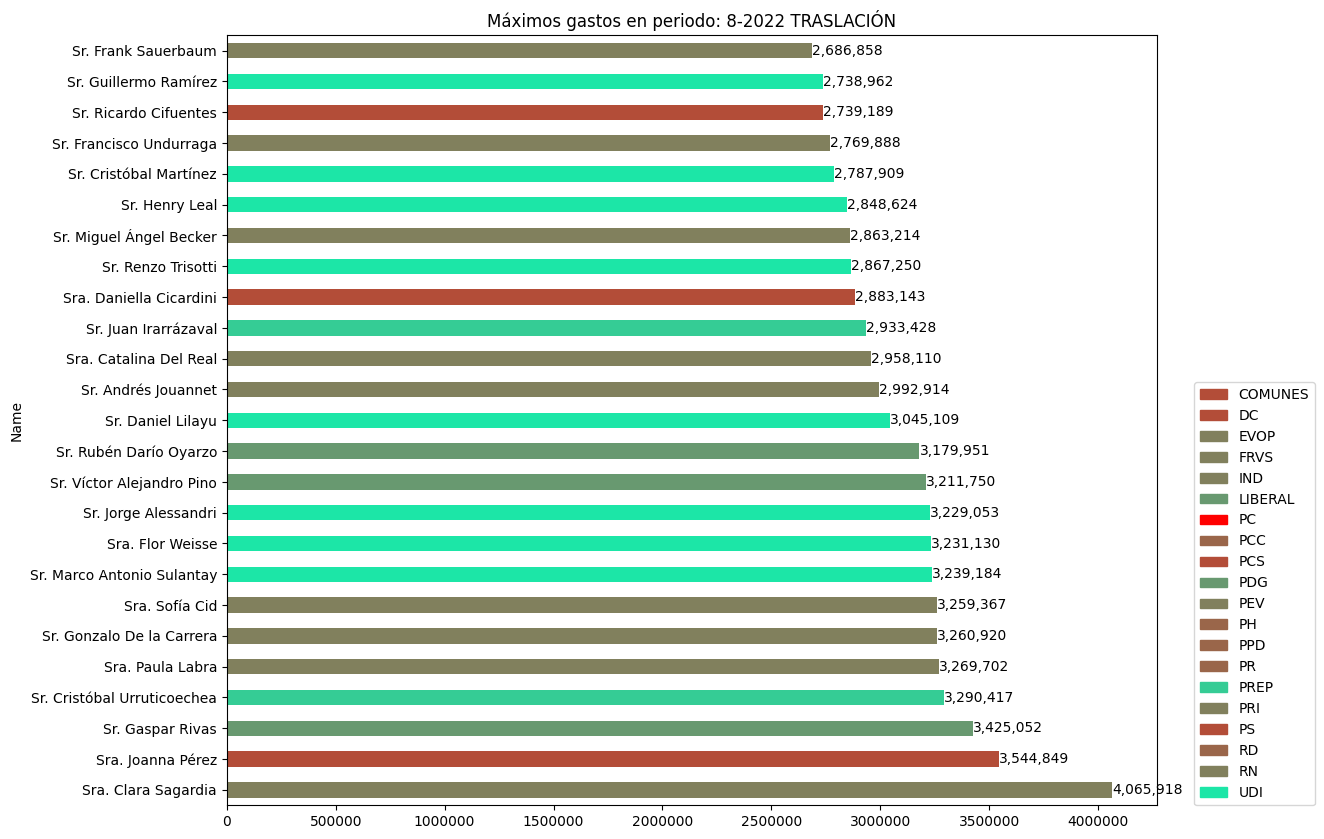

In [781]:
val = getValues(period)
analyze = val.sort_values(by="TRASLACIÓN", ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y="TRASLACIÓN", title="Máximos gastos en periodo: " + period + " TRASLACIÓN", color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


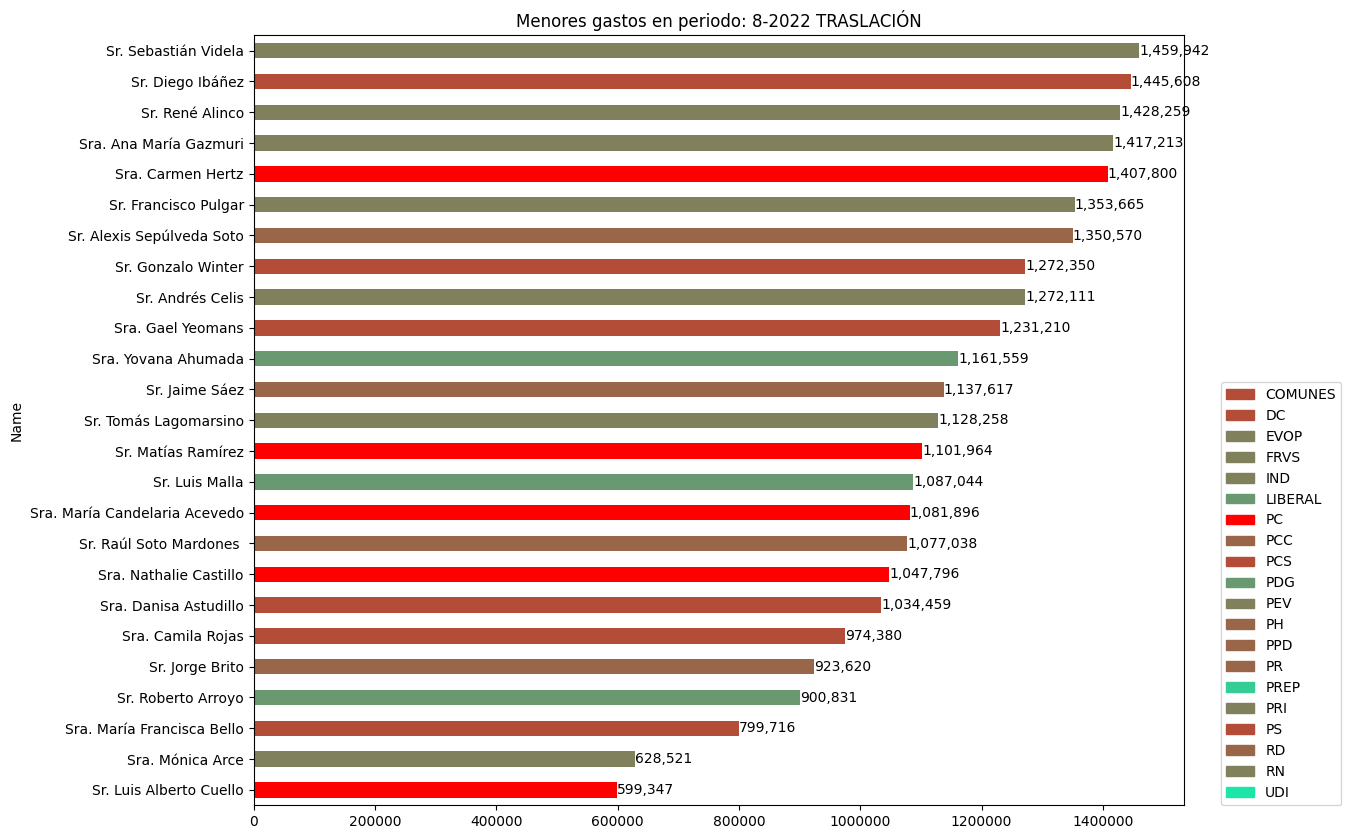

In [782]:
val = getValues(period)
analyze = val.sort_values(by="TRASLACIÓN", ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y="TRASLACIÓN", title="Menores gastos en periodo: " + period + " TRASLACIÓN", color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


# Por servicions menores

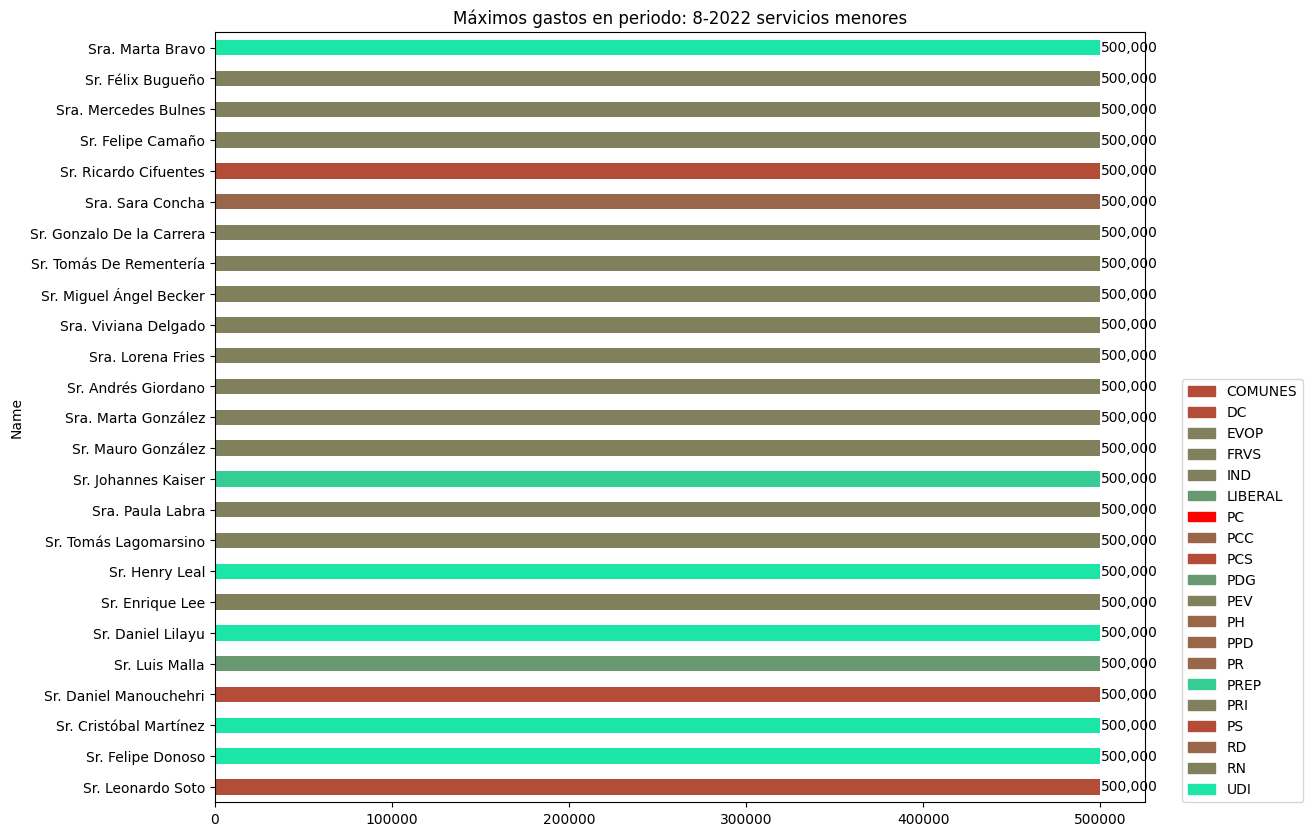

In [783]:
val = getValues(period)
analyze = val.sort_values(by="SERVICIOS MENORES", ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y="SERVICIOS MENORES", title="Máximos gastos en periodo: " + period + " servicios menores", color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


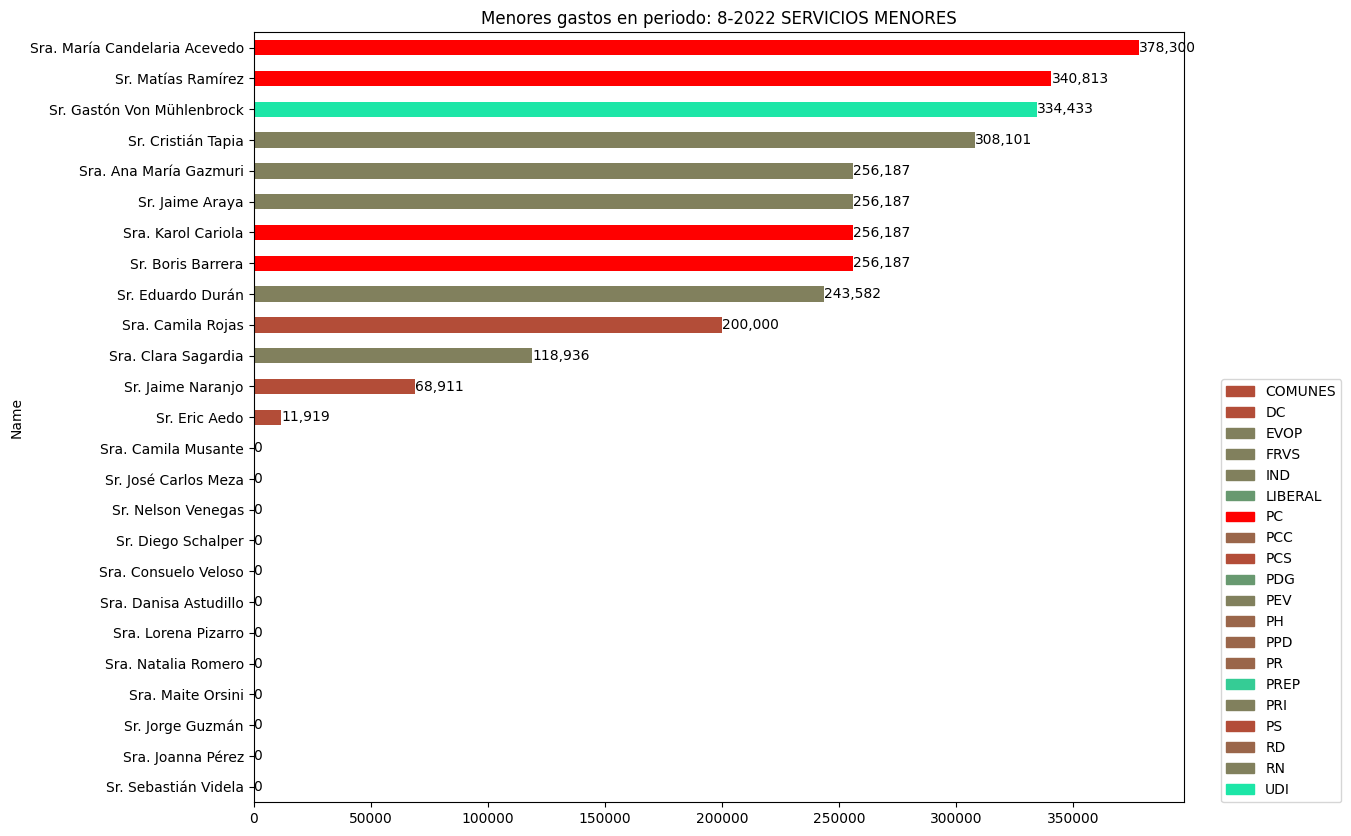

In [784]:
val = getValues(period)
analyze = val.sort_values(by="SERVICIOS MENORES", ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y="SERVICIOS MENORES", title="Menores gastos en periodo: " + period + " SERVICIOS MENORES", color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


# Arriendo de inmuebles

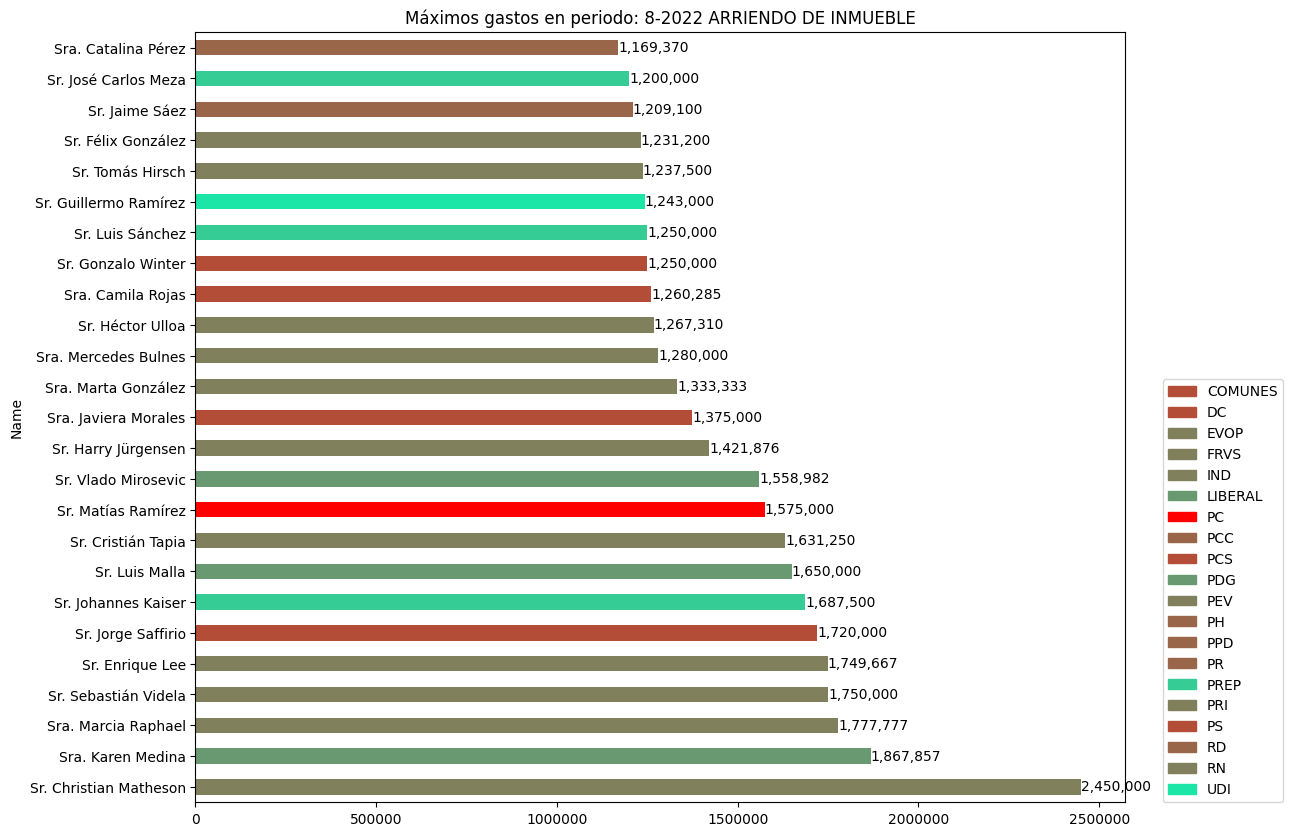

In [785]:
category = "ARRIENDO DE INMUEBLE"
val = getValues(period)
analyze = val.sort_values(by=category, ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Máximos gastos en periodo: " + period + " "+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


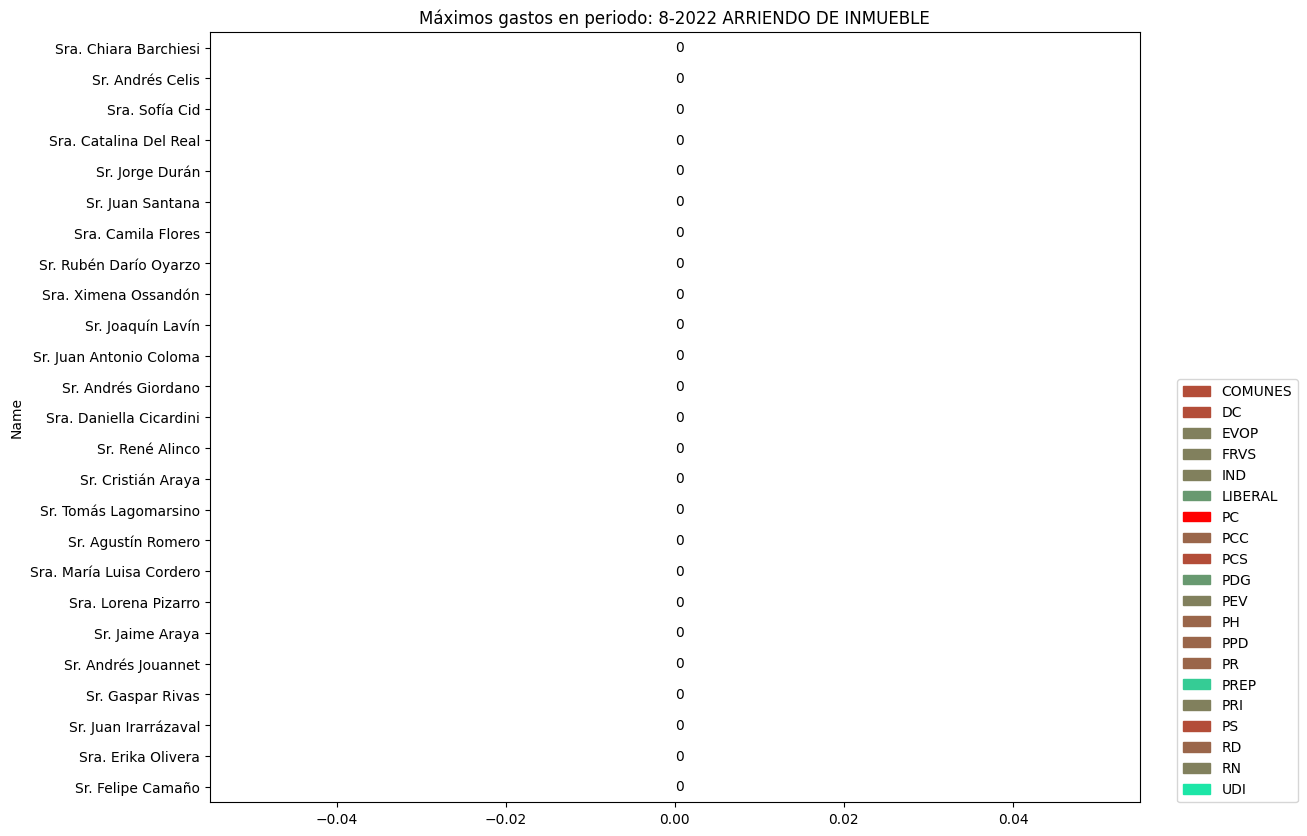

In [786]:
category = "ARRIENDO DE INMUEBLE"
val = getValues(period)
analyze = val.sort_values(by=category, ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Máximos gastos en periodo: " + period + " "+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


# Difusión

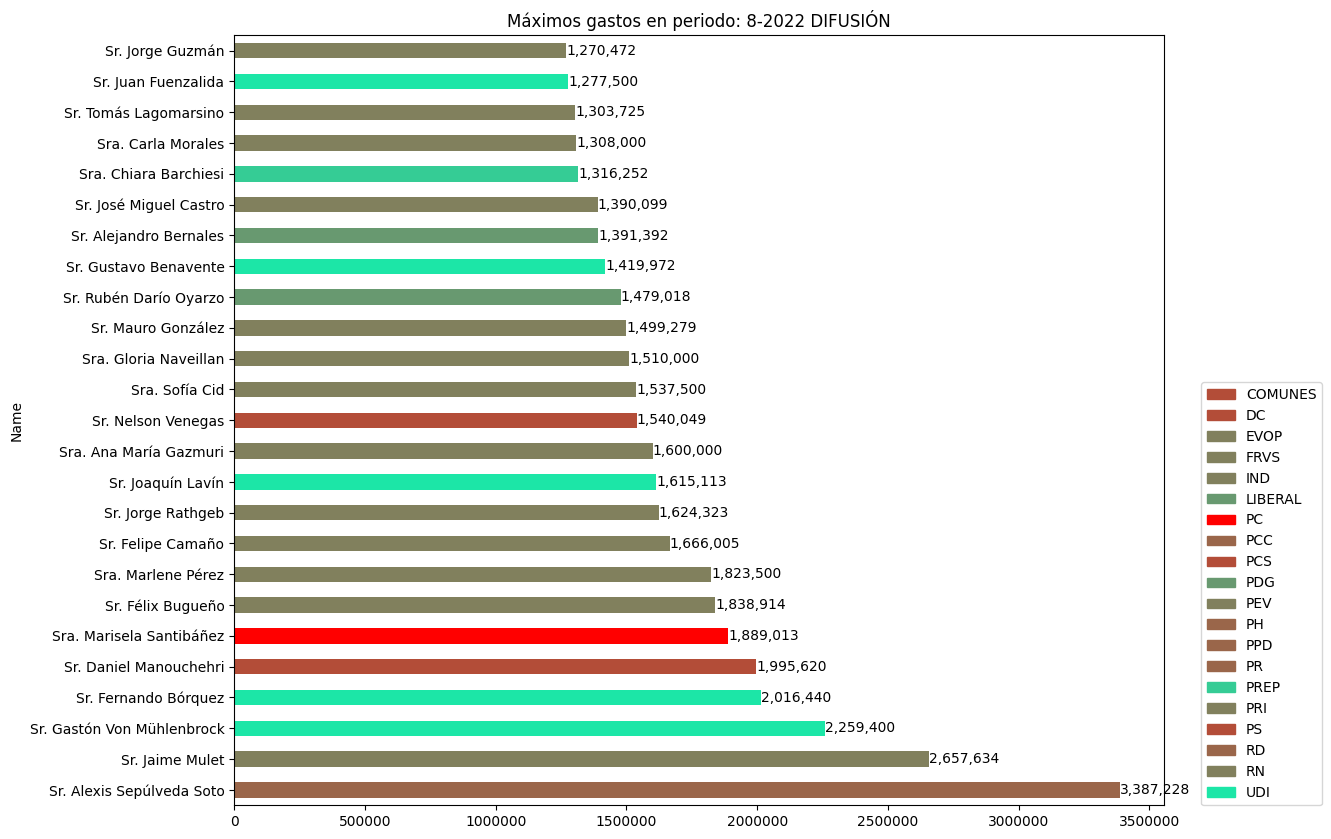

In [787]:
category = "DIFUSIÓN"
val = getValues(period)
analyze = val.sort_values(by=category, ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Máximos gastos en periodo: " + period + " "+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


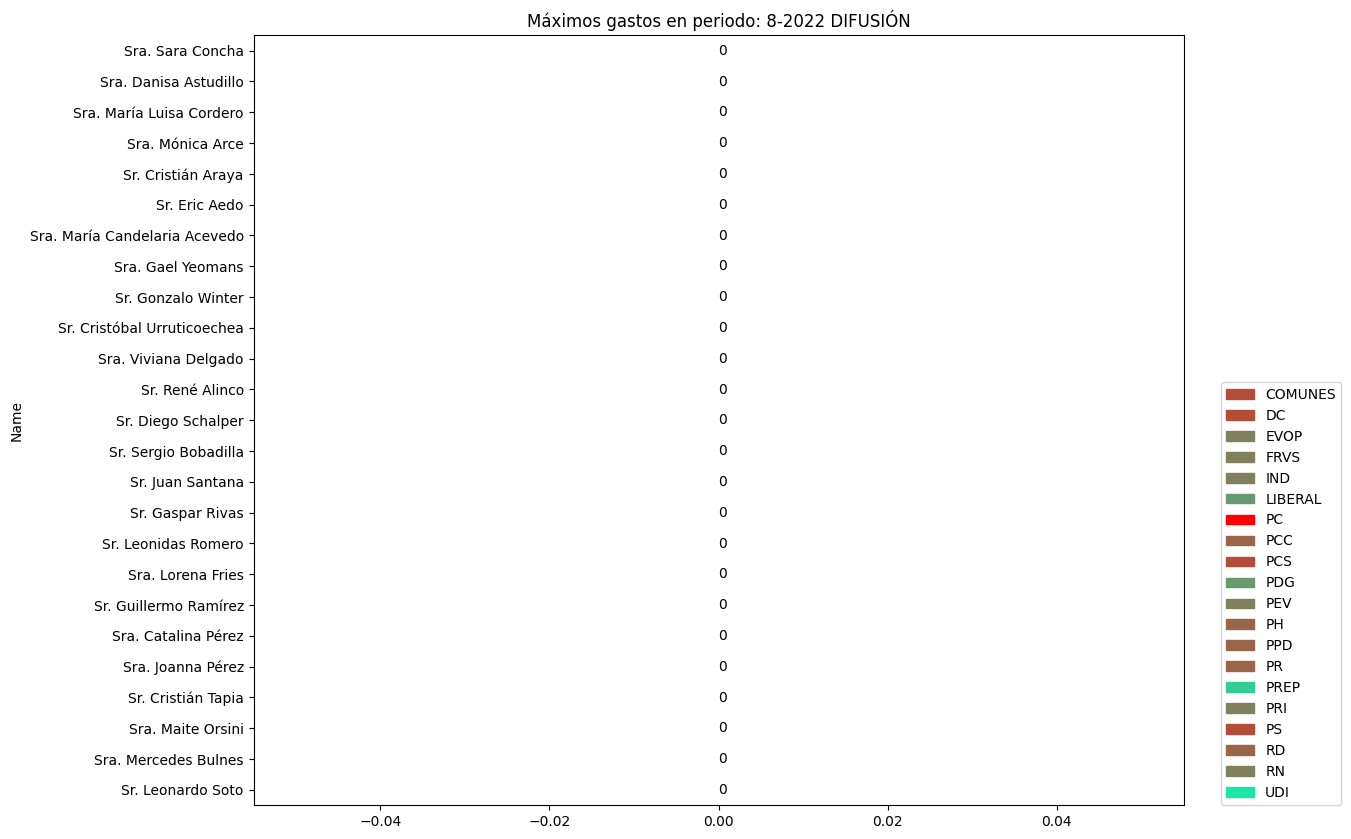

In [788]:
category = "DIFUSIÓN"
val = getValues(period)
analyze = val.sort_values(by=category, ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Máximos gastos en periodo: " + period + " "+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


# Telefonía

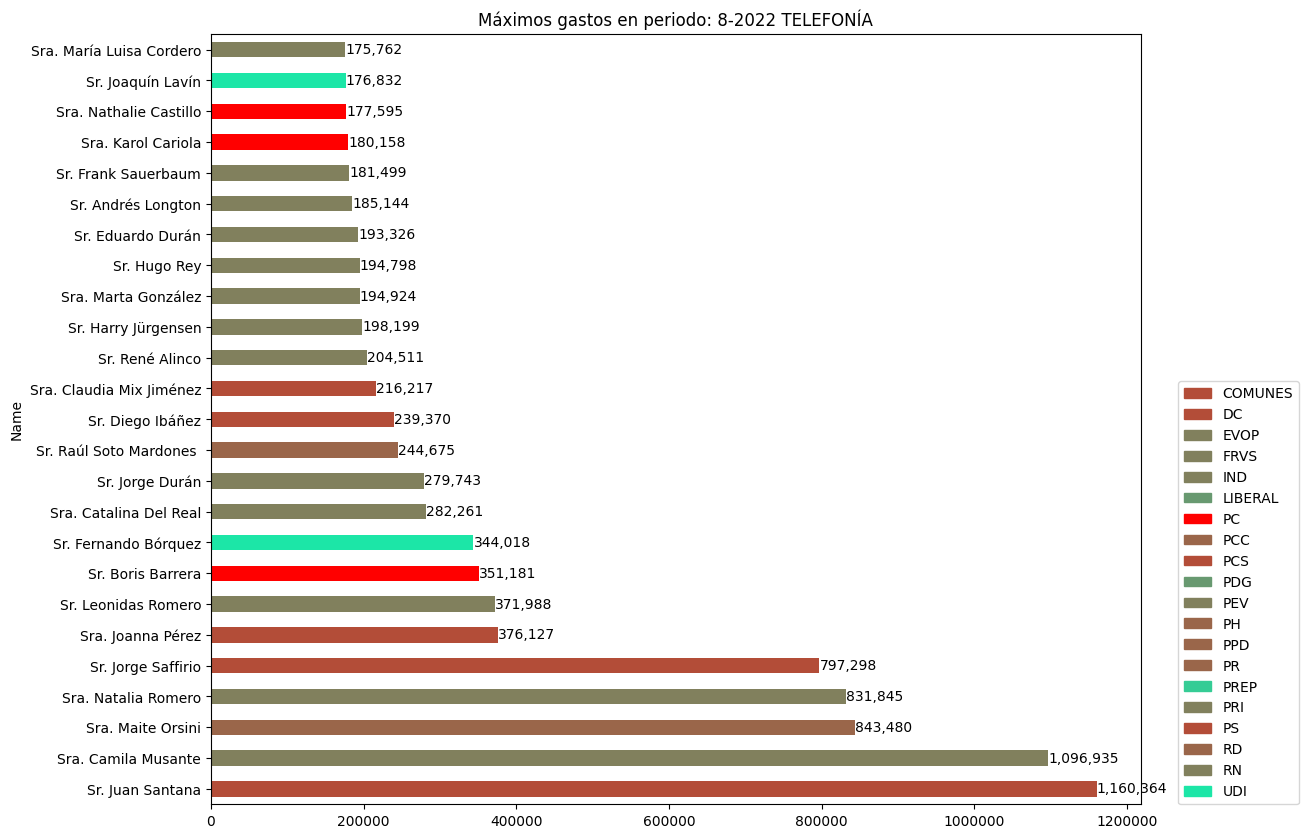

In [789]:
category = "TELEFONÍA"
val = getValues(period)
analyze = val.sort_values(by=category, ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Máximos gastos en periodo: " + period + " "+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


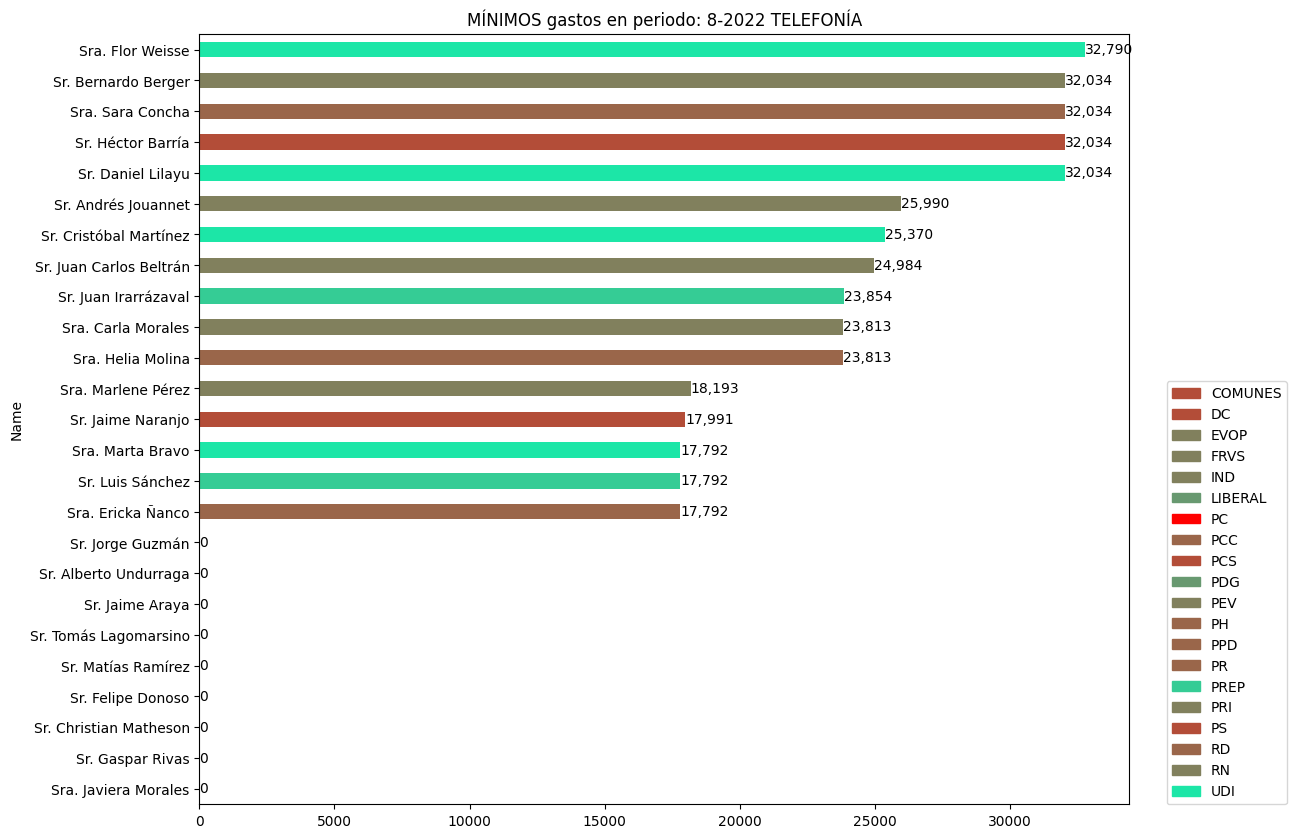

In [790]:
category = "TELEFONÍA"
val = getValues(period)
analyze = val.sort_values(by=category, ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="MÍNIMOS gastos en periodo: " + period + " "+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


# TRASPASO DESDE GASTOS OPERACIONES A ASIGNACIÓN PERSONAL DE APOYO

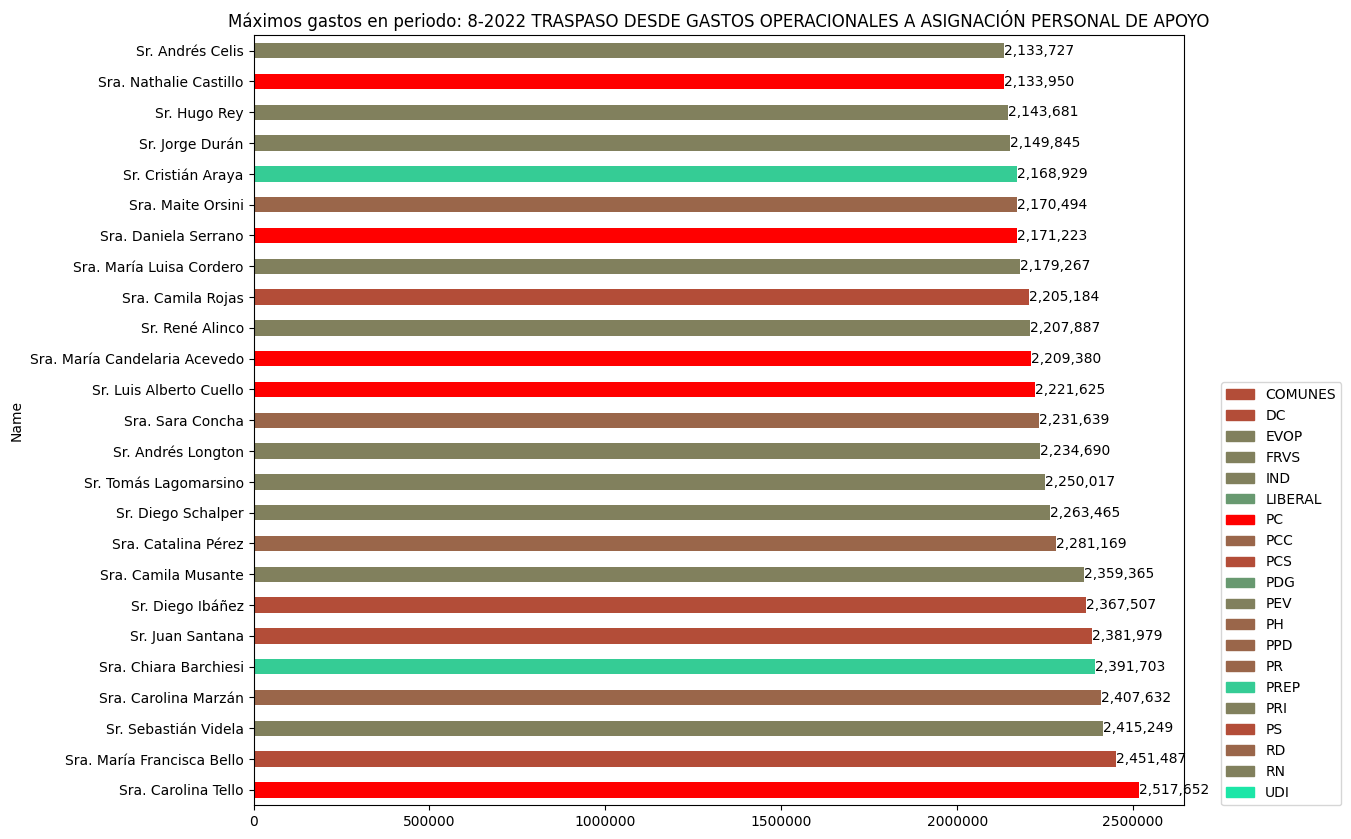

In [791]:
category = "TRASPASO DESDE GASTOS OPERACIONALES A ASIGNACIÓN PERSONAL DE APOYO"
val = getValues(period)
analyze = val.sort_values(by=category, ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Máximos gastos en periodo: " + period + " "+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


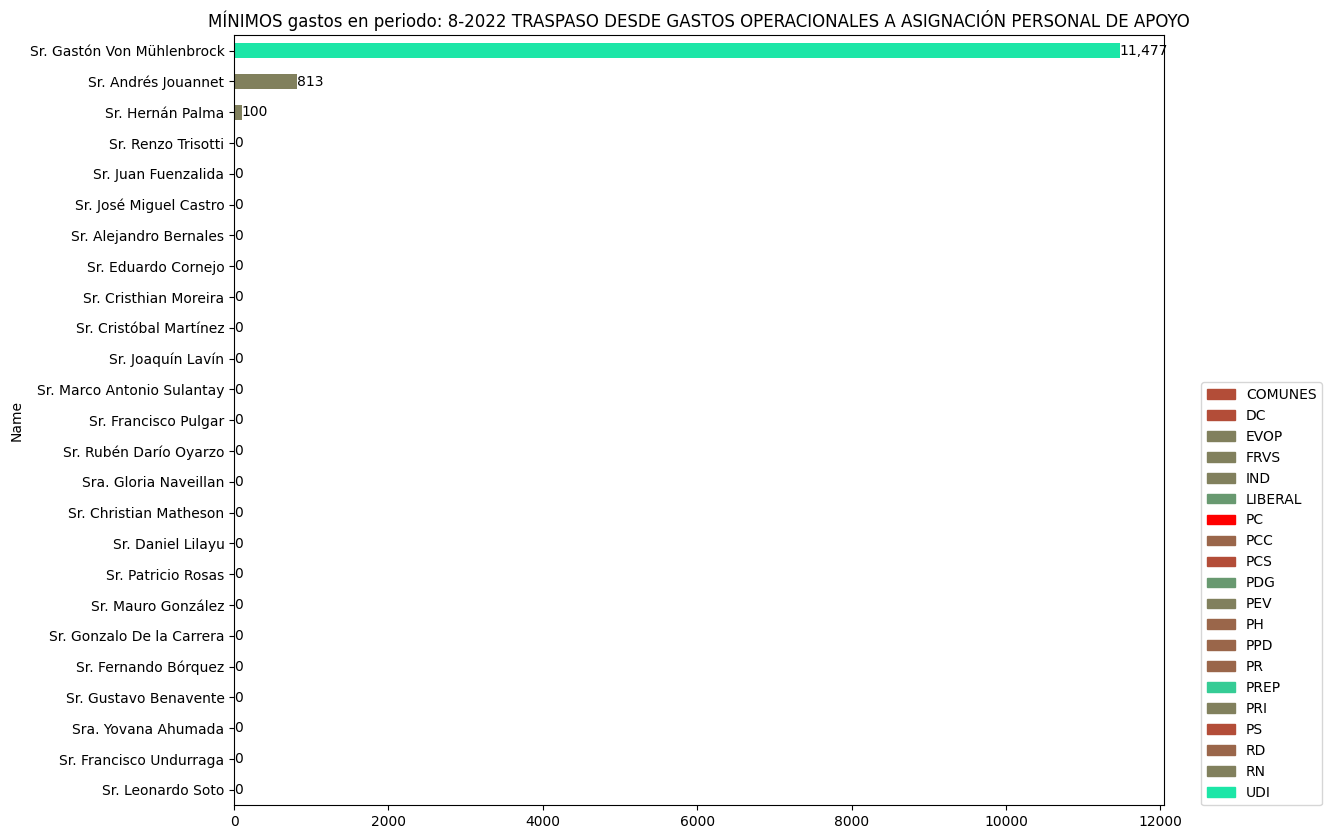

In [792]:
category = "TRASPASO DESDE GASTOS OPERACIONALES A ASIGNACIÓN PERSONAL DE APOYO"
val = getValues(period)
analyze = val.sort_values(by=category, ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="MÍNIMOS gastos en periodo: " + period + " "+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


# ETC
